# Pre-rpocessing for DINEOF

adattamento del fogio per julia per adattare i file in .nc annuali (marzo-ottobre) per essere processati con DINEOF

In [16]:
# import libraries for working with .nc
import xarray as xr
import os   
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd



In [2]:
# origin path

path =  '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/'


carico un file di esempio

In [4]:
year = 2010

               
        # temp path concatenate folder for year and month (e.g. 1998/03), with month in two digits
tpath = path + '{:04d}'.format(year)
tpath
# list all files
files = [os.path.join(tpath, f) for f in os.listdir(tpath)]

files


xx = xr.open_mfdataset(files, combine='by_coords')

xx

# print memory size of xx
print(xx.nbytes / 1e6, 'MB')

1291.550632 MB


interpolo la longitudine

aggrego 5 celle

In [7]:
ds = xx
tmp = ds['CHL'].fillna(np.NaN)  # Replace missing values with NaN
sst = tmp
time = ds['time']
lat = ds['latitude']
lon = ds['longitude']

# Size of SST dataset
print("Size of tmp:", tmp.shape)

ds.close()



Size of tmp: (245, 1248, 1056)


In [20]:
tmp

<xarray.DataArray 'CHL' (time: 245, latitude: 1248, longitude: 1056)>
dask.array<where, shape=(245, 1248, 1056), dtype=float32, chunksize=(31, 1248, 1056), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2010-03-01 2010-03-02 ... 2010-10-31
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
Attributes:
    long_name:          Chlorophyll-a concentration in sea water using the OC...
    units:              milligram m-3
    standard_name:      mass_concentration_of_chlorophyll_a_in_sea_water
    units_nonstandard:  mg m^-3
    type:               surface
    source:             ENVISAT,Aqua,Orbview-2/SeaStar-MERIS,MODISA,SeaWiFS-L3
    valid_max:          66.83439
    valid_min:          0.01

In [8]:
# Start and end dates of our dataset
print("time[0]:", time[0].values)
print("time[-1]:", time[-1].values)
print("Type of sst:", type(sst))

time[0]: 2010-03-01T00:00:00.000000000
time[-1]: 2010-10-31T00:00:00.000000000
Type of sst: <class 'xarray.core.dataarray.DataArray'>


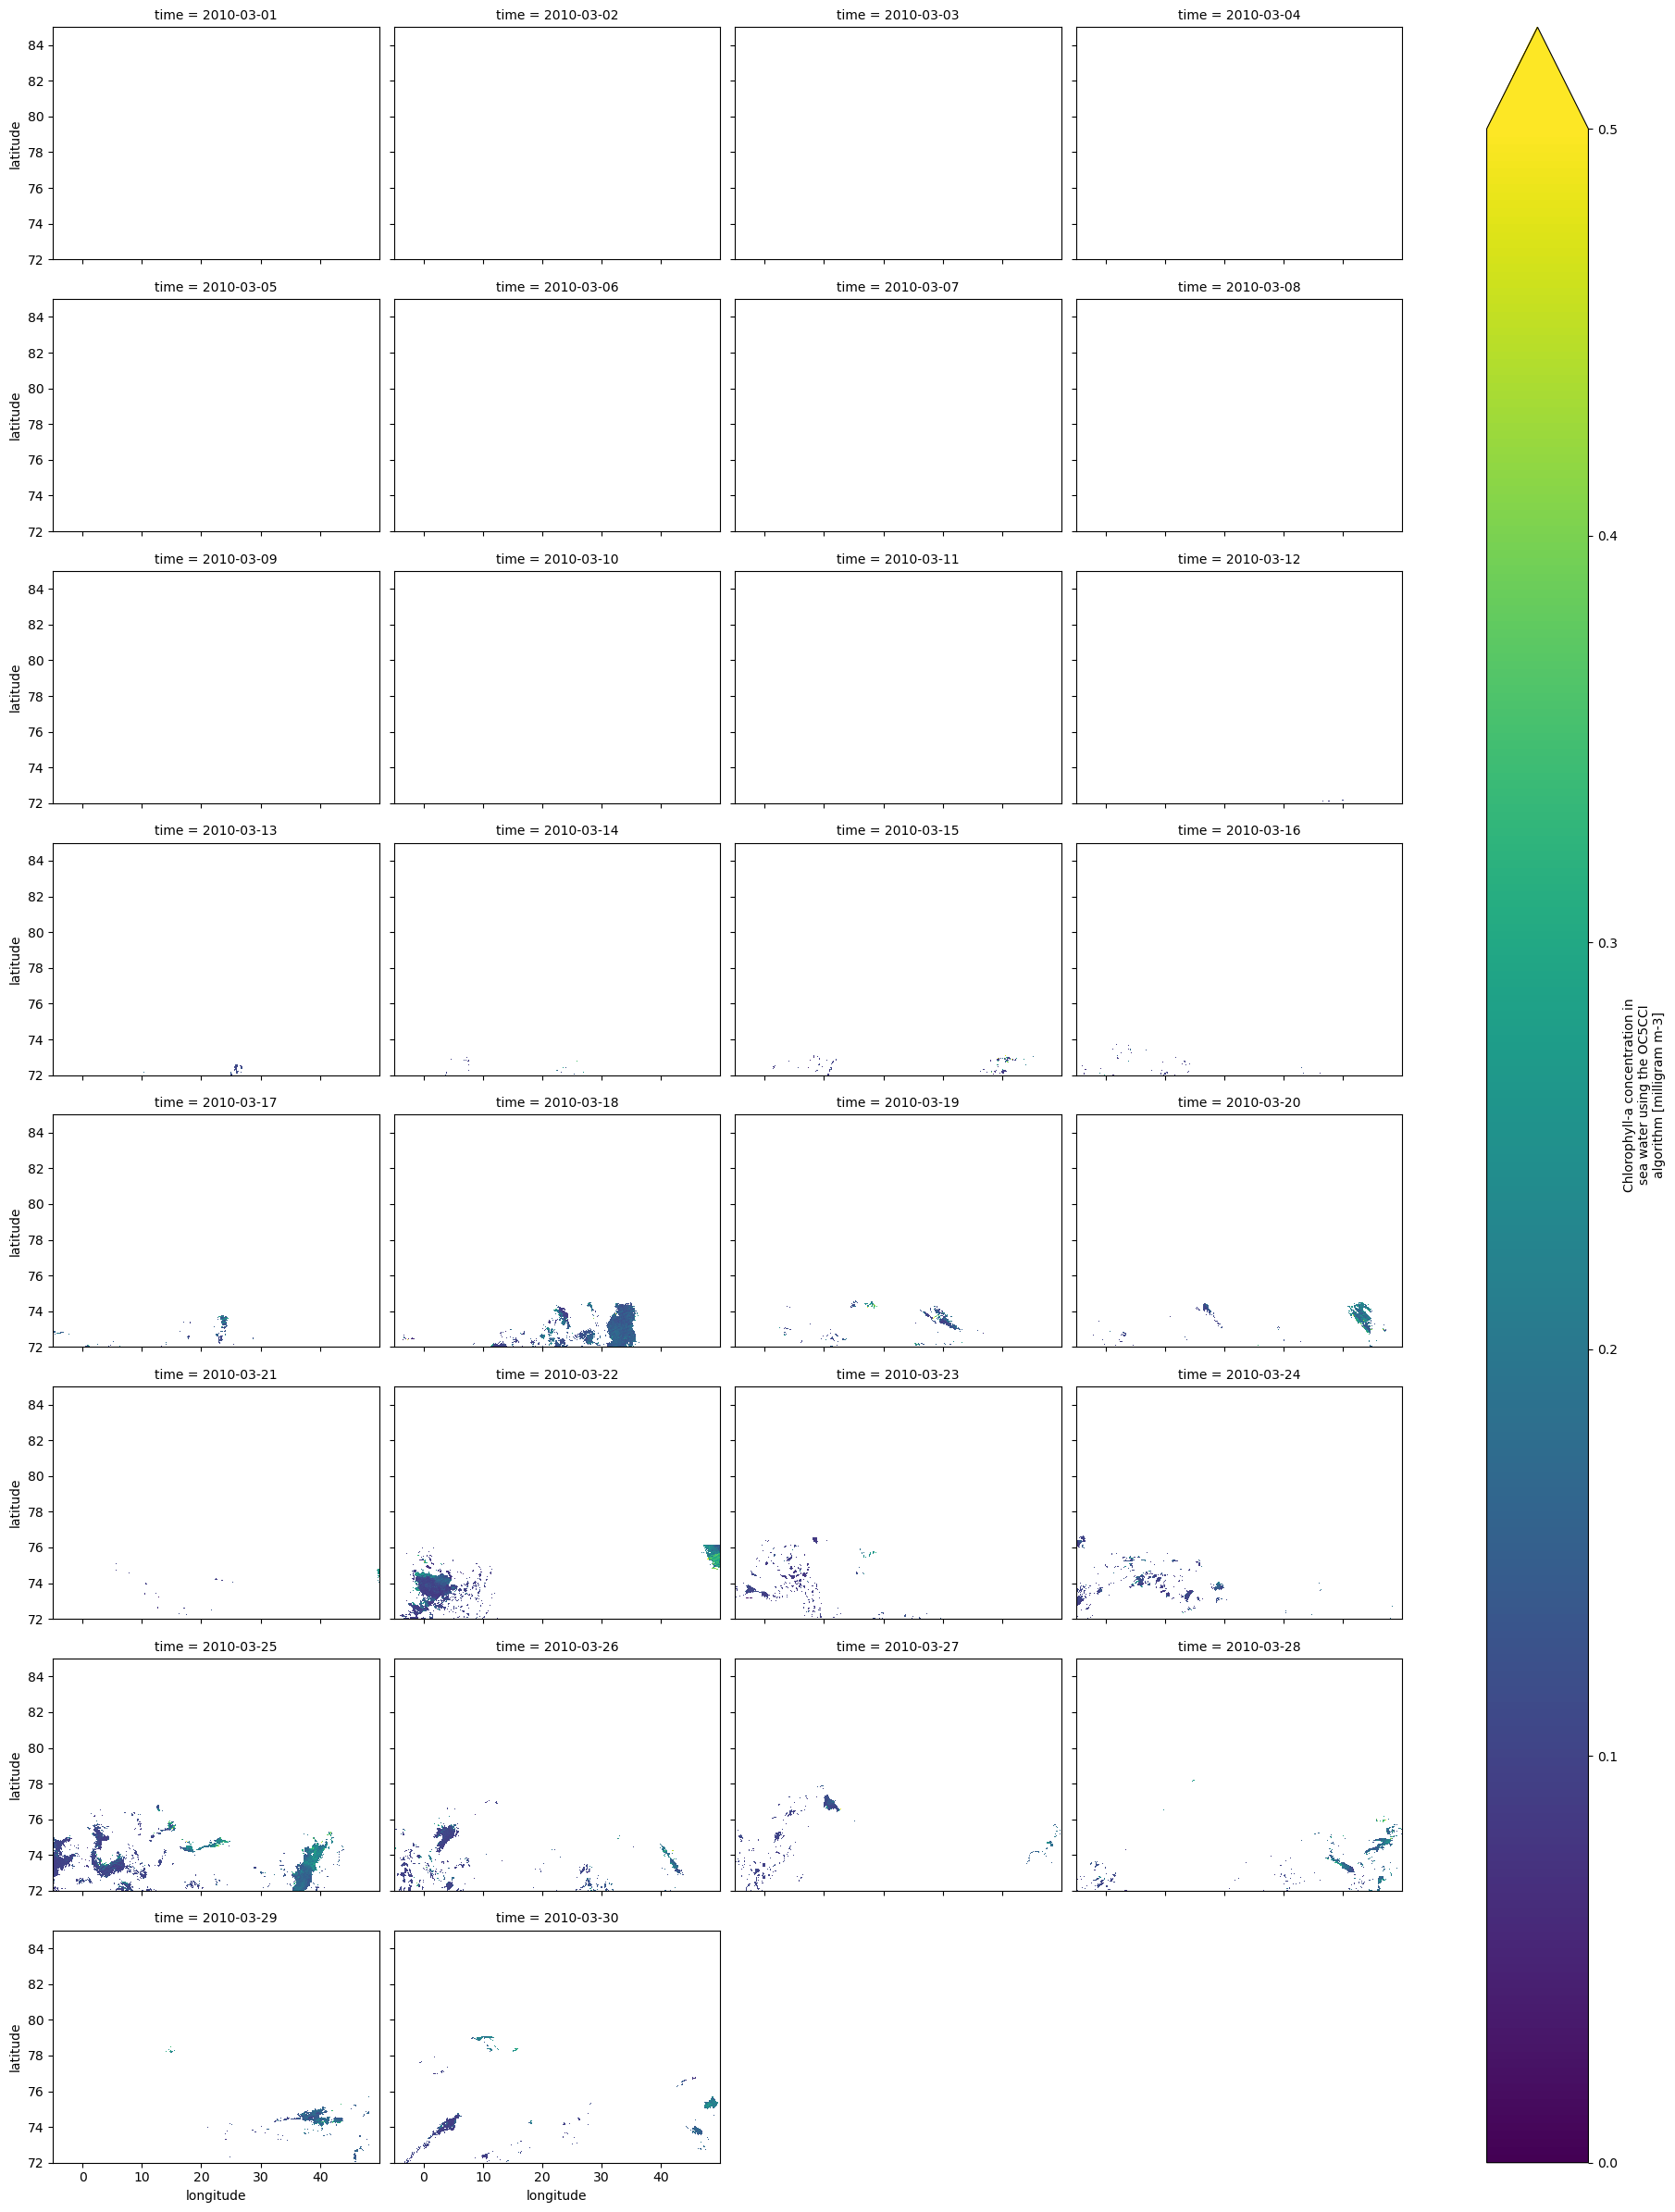

In [66]:
# plot first 30 days
x30 = xx.isel(time=slice(0, 30))
x30['CHL'].plot(col='time', col_wrap=4, cmap='viridis', vmin=0, vmax=0.5, size=3, aspect=1.5)

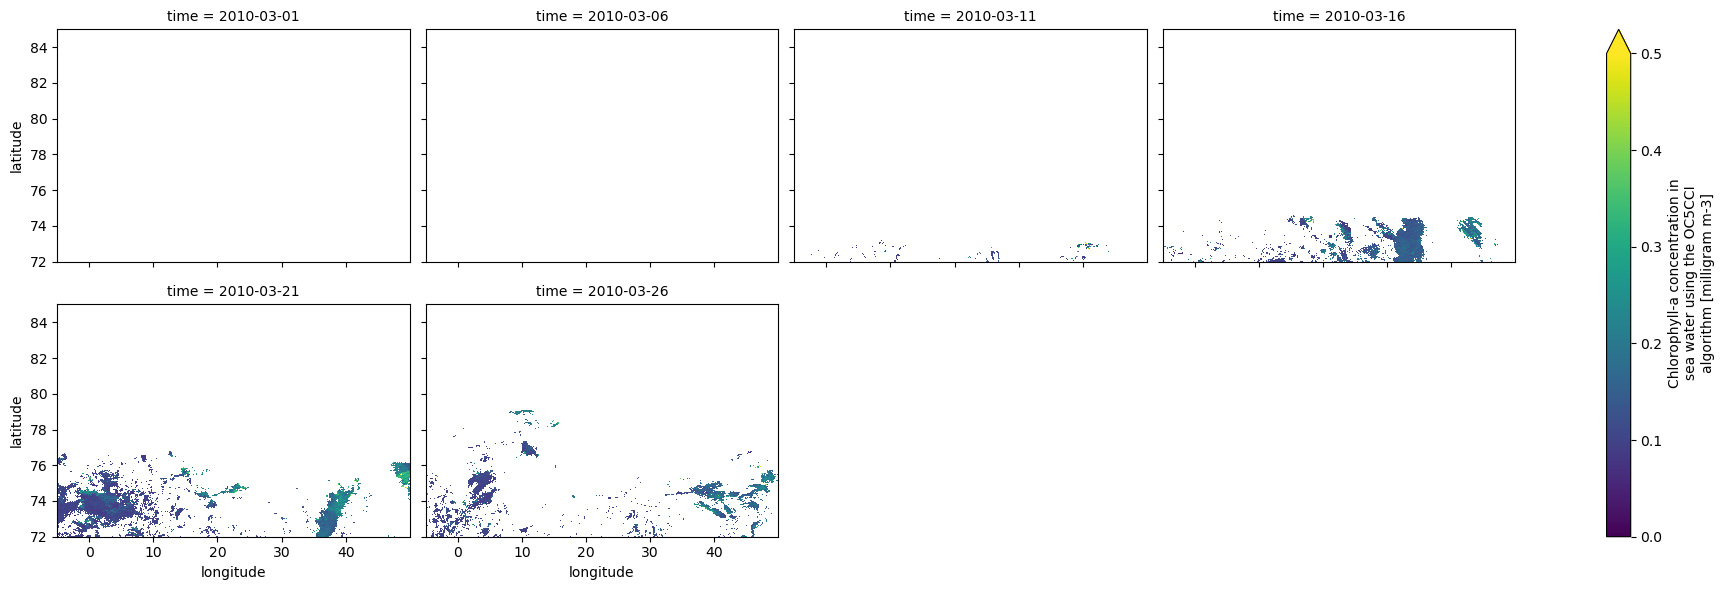

In [67]:
# aggregate x30 with mean every 5 days
x30five  = x30.resample(time='5D').mean()
x30five['CHL'].plot(col='time', col_wrap=4, cmap='viridis', vmin=0, vmax=0.5, size=3, aspect=1.5)

In [37]:
# print time format for ds.time
print(ds.time.encoding)

{'zlib': False, 'szip': False, 'zstd': False, 'bzip2': False, 'blosc': False, 'shuffle': False, 'complevel': 0, 'fletcher32': False, 'contiguous': True, 'chunksizes': None, 'source': '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/2010/CHL_03-10_2010_3.nc', 'original_shape': (31,), 'dtype': dtype('int32'), 'units': 'seconds since 1970-01-01', 'calendar': 'gregorian'}


In [79]:
# Transform time variable (in seconds) into year-day
mdate = xF3.time.values
mdate

array(['2010-03-21T00:00:00.000000000', '2010-03-24T00:00:00.000000000',
       '2010-03-27T00:00:00.000000000', '2010-03-30T00:00:00.000000000',
       '2010-04-02T00:00:00.000000000', '2010-04-05T00:00:00.000000000',
       '2010-04-08T00:00:00.000000000', '2010-04-11T00:00:00.000000000',
       '2010-04-14T00:00:00.000000000', '2010-04-17T00:00:00.000000000',
       '2010-04-20T00:00:00.000000000', '2010-04-23T00:00:00.000000000',
       '2010-04-26T00:00:00.000000000', '2010-04-29T00:00:00.000000000',
       '2010-05-02T00:00:00.000000000', '2010-05-05T00:00:00.000000000',
       '2010-05-08T00:00:00.000000000', '2010-05-11T00:00:00.000000000',
       '2010-05-14T00:00:00.000000000', '2010-05-17T00:00:00.000000000',
       '2010-05-20T00:00:00.000000000', '2010-05-23T00:00:00.000000000',
       '2010-05-26T00:00:00.000000000', '2010-05-29T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-06-04T00:00:00.000000000',
       '2010-06-07T00:00:00.000000000', '2010-06-10

In [83]:
ds = xF3
tmp = ds['CHL'].fillna(np.NaN)  # Replace missing values with NaN
sst = tmp
time = ds['time']
lat = ds['latitude']
lon = ds['longitude']

# Size of SST dataset
print("Size of tmp:", tmp.shape)

ds.close()



Size of tmp: (62, 1248, 1056)


In [85]:
# take the 34 first days of the year of ds
ex = sst.isel(time=34)
ex

# count the number of non NaN values in the dataset
exNaN = np.count_nonzero(np.isnan(ex))
exNaN / ex.size





0.8420070597804973

In [87]:
proportion_of_nans = [np.count_nonzero(np.isnan(sst.isel(time=i))) / sst.isel(time=i).size for i in range(sst.time.size)]


In [93]:
# n of days with more than 97% of NaNs
len([i for i in proportion_of_nans if i < 0.04]) / len(proportion_of_nans)

0.0

tutti hanno una certa percentuale di pixel!

In [91]:
len(proportion_of_nans)

62

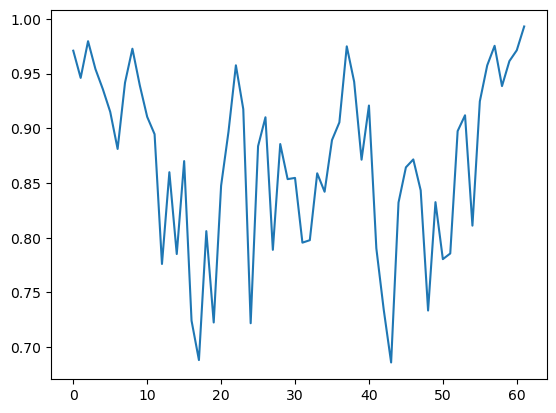

In [89]:
# plot proportion_of_nans
plt.plot(proportion_of_nans)


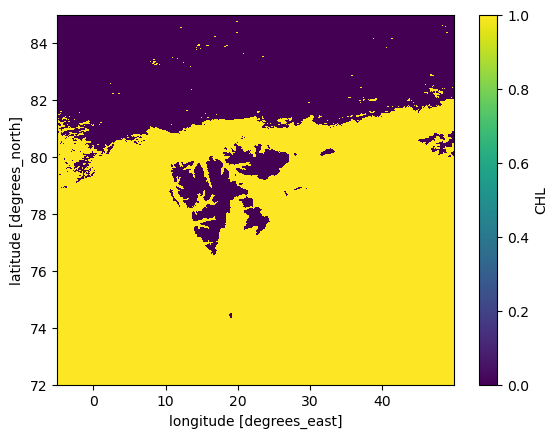

In [94]:


# Create a first land-sea mask. This mask will be "refined" by eliminating pixels that are
# covered more than 98% of the time and images that are covered more than 98% in space
mask = sst.mean(dim='time')
mask = mask.notnull().astype(int)
mask.plot()

In [95]:
covT.shape

(1248, 1056)

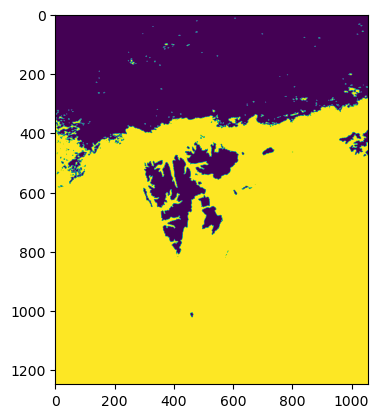

In [96]:
#plot mask

plt.imshow(mask)

In [97]:
 #print the first 10 values of the mdate
 print(mdate[0:10])
 

['2010-03-21T00:00:00.000000000' '2010-03-24T00:00:00.000000000'
 '2010-03-27T00:00:00.000000000' '2010-03-30T00:00:00.000000000'
 '2010-04-02T00:00:00.000000000' '2010-04-05T00:00:00.000000000'
 '2010-04-08T00:00:00.000000000' '2010-04-11T00:00:00.000000000'
 '2010-04-14T00:00:00.000000000' '2010-04-17T00:00:00.000000000']


In [98]:
covT

<xarray.DataArray 'CHL' (latitude: 1248, longitude: 1056)>
dask.array<mul, shape=(1248, 1056), dtype=float64, chunksize=(1248, 1056), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95

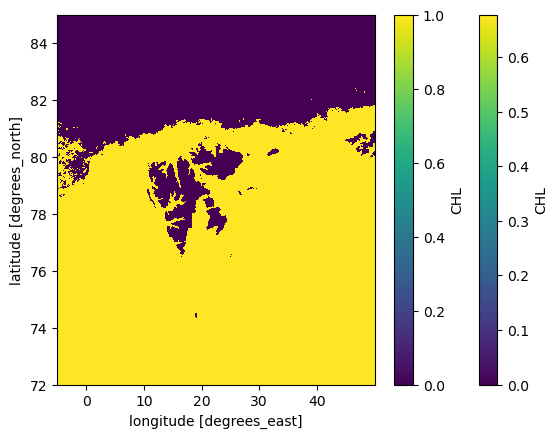

In [146]:
# replace NaNs with 0 and values with 1
# Step 1: Create a binary mask where 1 indicates valid data (i.e., non-NaN values) and 0 indicates no data (i.e., NaN values)
binary_mask = ds.CHL.notnull()

# Step 2: Sum the binary mask along the 'time' dimension to count the number of valid images for each pixel
valid_image_count = binary_mask.sum(dim='time')

# Step 3: Divide the sum by the total number of time steps in the dataset to obtain the percentage of valid images per pixel
percentage_valid_images = valid_image_count / ds.time.size

# Step 4: Plot the resulting DataArray
percentage_valid_images.plot()

# Step 5: Create a binary mask with 0 if the proportion is less than 0.03 and 1 elsewhere
final_mask = percentage_valid_images.where(percentage_valid_images >= 0.03, 0)
final_mask = final_mask.where(final_mask == 0, 1)

# Step 5: Plot the resulting DataArray
final_mask.plot()


In [169]:
time
# time as days since 1970-01-01 00:00:00
time2 = time.values.astype('datetime64[D]') - np.datetime64('1970-01-01')
time2

array([14689, 14692, 14695, 14698, 14701, 14704, 14707, 14710, 14713,
       14716, 14719, 14722, 14725, 14728, 14731, 14734, 14737, 14740,
       14743, 14746, 14749, 14752, 14755, 14758, 14761, 14764, 14767,
       14770, 14773, 14776, 14779, 14782, 14785, 14788, 14791, 14794,
       14797, 14800, 14803, 14806, 14809, 14812, 14815, 14818, 14821,
       14824, 14827, 14830, 14833, 14836, 14839, 14842, 14845, 14848,
       14851, 14854, 14857, 14860, 14863, 14866, 14869, 14872],
      dtype='timedelta64[D]')

In [140]:
final_mask

<xarray.DataArray 'CHL' (latitude: 1248, longitude: 1056)>
dask.array<where, shape=(1248, 1056), dtype=float64, chunksize=(1248, 1056), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95

In [100]:

#sstb = sst.isel(time=valid_indices)  # Remove those images
#mdateb = mdate[valid_indices]  # Remove those dates from the time vector

# Old and new temporal size of the SST matrix
#print("Size of sst:", sst.shape)
#print("Size of sstb:", sstb.shape)

# Old and new temporal size of the COV matrix
#print("Size of covT:", covT.shape)
#print("Size of covTb:", covTb.shape)

In [149]:
# print current directory
print(os.getcwd())

/mnt/d/Dropbox/R_projects/SV_phenology/R


ricontrollo la risoluzione

le celle sono quasi quadrate!

In [172]:
# Step 5: Add the final_mask as a new variable to the original dataset
xF3['mask'] = final_mask
xF3['time2'] = time2
# Step 6: Replace the missing values (NaN) in the dataset with -9999.f0 and cast to float32 dtype
#ds = ds.fillna(-9999.0).astype(np.float32)

# check the new dataset
xF3
xF3 = xF3.fillna(-9999.0)
# Step 7: Save the updated dataset as a netCDF file
xF3.to_netcdf("/mnt/d/Dropbox/R_projects/SV_phenology/test_chl3days.nc", format='NETCDF4', encoding={'CHL': {'_FillValue': -9999.0}})

# Step 7: Save the updated dataset as a netCDF file
xF3

<xarray.Dataset>
Dimensions:    (time: 62, latitude: 1248, longitude: 1056, time2: 62)
Coordinates:
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
  * time       (time) datetime64[ns] 2010-03-21 2010-03-24 ... 2010-09-20
  * time2      (time2) timedelta64[ns] 14689 days 14692 days ... 14872 days
Data variables:
    CHL        (time, latitude, longitude) float32 dask.array<chunksize=(1, 1248, 1056), meta=np.ndarray>
    mask       (latitude, longitude) float64 dask.array<chunksize=(1248, 1056), meta=np.ndarray>

copio nella cartella di lavoro DINEOF

In [166]:
sudo cp /mnt/d/Dropbox/R_projects/SV_phenology/test_chl3days.nc /home/DINEOF/test_chl3daysPY.nc#! 

[sudo] password for matzuc: 


muovo a mano il file in /home/DINEOF/

faccio andare lo script in Julia, semplificato